# Pengembangan Decision Trees

Dalam contoh sedan dan minibus di atas kita hanya menggunakan tiga *feature* sederhana sehingga proses pembuatan *Decision tree* menjadi mudah. Jika kita memiliki banyak *feature* maka terlebih dahulu dilakukan profiling, yaitu membuang variabel yang tidak relevan dengan melihat korelasi antar variabel.

## Random Forest

Metode ini memungkinkan kita menggabungkan beberapa model untuk mendapatkan hasil yang lebih baik daripada menjalankan setiap model sendiri-sendiri. Untuk mengatasi kelemahan *decision tree*, metode RF banyak dimanfaatkan untuk mencapai hasil akurasi yang lebih baik. Prinsipnya adalah membangun beberapa model *decision tree* dan kemudian mengabungkan hasilnya.

Karena *Decision Tree* seringkali dimanfaatkan untuk membangun *classification model*, fungsi penggabungan ini berupa mekanisme **voting** (penentuan suara terbanyak) yang menjadi penentu keluaran mana yang akan dipakai. Setiap *tree* akan memberikan hak suaranya, dan kelas yang paling populer akan dimenangkan sebagai hasil akhir. Dalam RF, mekanisme *voting* dilaksanakan dengan memanfaatkan *test dataset* ketika proses validasi terjadi.

Scikit-learn menyediakan modul **sklearn.ensemble** yang di dalamnya terdapat **RandomForestClassifier** untuk keperluan membuat RF.

# Library

In [1]:
# Library data manipulation
import pandas as pd
import numpy as np

# Library untuk pembuatan model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk mengukur akurasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dataset

In [2]:
# Import data
data = pd.read_csv('klasifikasi jenis mobil.csv',header=0)

# Drop ID
data.drop('ID',axis=1,inplace=True)

# Check data
data.head()

,mesin,bangku,penggerak,label
0,bensin,4,depan,sedan
1,bensin,2,depan,sedan
2,bensin,8,belakang,minibus
3,diesel,6,depan,minibus
4,bensin,5,belakang,minibus


# Data Prepocessing

In [3]:
# Define categorical columns
categorical_cols = [cname for cname in data.columns if data[cname].dtype == "object"]
# Drop label
categorical_cols.remove('label')
# Check categorical columns
categorical_cols

['mesin', 'penggerak']

In [4]:
# Define numerical columns
numerical_cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]
# Checking the numerical columns
numerical_cols

['bangku']

In [5]:
# One hot encoding for categorical columns
OR_encoder = OneHotEncoder()
# Fit and transform the categorical columns
data_cat_encoded = OR_encoder.fit_transform(data[categorical_cols])
# Assign to dataframe
data_cat_encoded = pd.DataFrame(data_cat_encoded.toarray(), columns=OR_encoder.get_feature_names_out(categorical_cols))

In [6]:
# Joining the numerical and categorical dataframes
data_encoded = pd.concat([data[numerical_cols], data_cat_encoded], axis=1)

# Check the result
data_encoded.head()

,bangku,mesin_bensin,mesin_diesel,penggerak_belakang,penggerak_depan
0,4,1.0,0.0,0.0,1.0
1,2,1.0,0.0,0.0,1.0
2,8,1.0,0.0,1.0,0.0
3,6,0.0,1.0,0.0,1.0
4,5,1.0,0.0,1.0,0.0


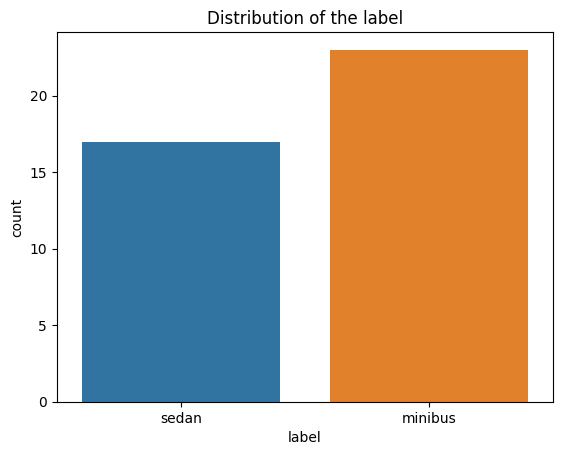

In [7]:
# Define X and Y
X = data_encoded
Y = data["label"]

# Check the distribution of the label
sns.countplot(x=Y, data=data)
plt.title("Distribution of the label")
plt.show()

# Splitting Dataset

In [8]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify=Y)

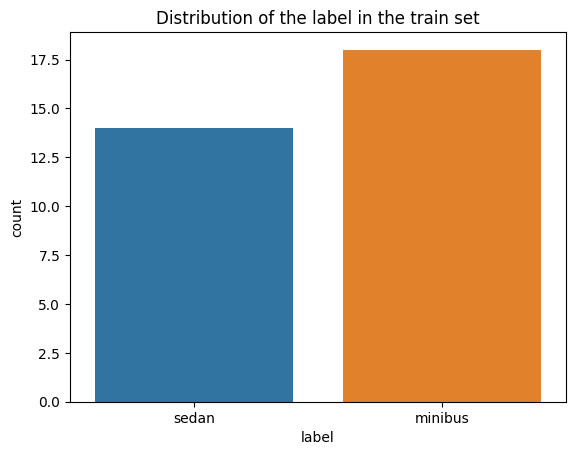

In [9]:
# Check the distribution of the label in the train set
sns.countplot(x=Y_train, data=Y_train)
plt.title("Distribution of the label in the train set")
plt.show()

# Modelling

In [10]:
# Base model
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=123)

In [11]:
# Predict the test set
Y_pred = rf.predict(X_test)

# Check the classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

     minibus       1.00      1.00      1.00         5
       sedan       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [12]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

# Feature Importance

In [13]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importance

,feature,importance
0,bangku,0.509675
1,penggerak_depan,0.170257
2,penggerak_belakang,0.166178
3,mesin_diesel,0.080741
4,mesin_bensin,0.073149


Text(0.5, 1.0, 'Feature importance')

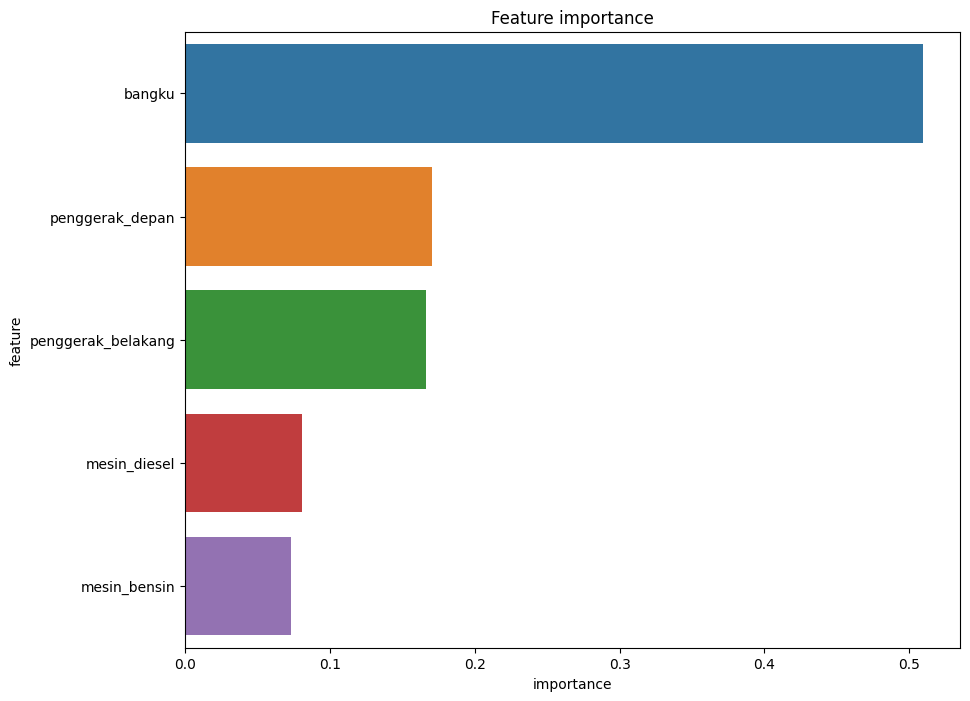

In [14]:
# Visualize the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature importance")

# Random Forest Dataset yang lebih besar

## Dataset

In [15]:
df = pd.read_csv("bab6_adult_data.csv",skipinitialspace=True, header=0)


In [16]:
df.head()

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocessing

### Encode

In [17]:
ordinal_df = ['education', 'income']
categoric_df = ['workclass', 'occupation', 'marital_status', 'relationship', 'race', 'sex', 'native_country']

In [18]:
edu_map = {'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '7th-8th': 5, '9th': 6, '10th': 7, '11th': 8, '12th': 9, 'HS-grad': 10, 'Some-college': 11, 'Assoc-acdm': 12, 'Assoc-voc': 12, 'Prof-school': 13
, 'Bachelors': 14, 'Masters': 15, 'Doctorate': 16}
# Map the categories to integer values
df['education'] = df['education'].map(edu_map)

income_map = {'<=50K': 1, '<=50K.': 2, '>50K': 3, '>50K.': 4}
# Map the categories to integer values
df['income'] = df['income'].map(income_map)

In [19]:
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df[ordinal_df])

In [20]:
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
# Check categorical columns
categorical_cols

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [21]:
# One hot encoding for categorical columns
OR_encoder = OneHotEncoder()
# Fit and transform the categorical columns
df_cat_encoded = OR_encoder.fit_transform(df[categorical_cols])
# Assign to dfframe
df_cat_encoded = pd.DataFrame(df_cat_encoded.toarray(), columns=OR_encoder.get_feature_names_out(categorical_cols))

In [22]:
# Define numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
# Checking the numerical columns
numerical_cols

['age',
 'fnlwft',
 'education',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours-per-week',
 'income']

In [23]:
# Joining the numerical and categorical dfframes
df_encoded = pd.concat([df[numerical_cols], df_cat_encoded], axis=1)

# Check the result
df_encoded.head()

,age,fnlwft,education,education_num,capital_gain,capital_loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,77516,14,13,2174,0,40,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,14,13,0,0,13,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,10,9,0,0,40,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,8,7,0,0,40,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,14,13,0,0,40,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y = df_encoded.income
X = df_encoded.drop(['income'], axis=1)

## Modelling

In [25]:
X_train, X_test, y_train, y_test = (train_test_split(X,y,test_size=0.3, stratify=y, random_state=42))

In [26]:
rf1 = RandomForestClassifier()

model = rf1.fit(X_train,y_train)

In [27]:
# Predict the test set
Y_pred = rf1.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.59      0.79      0.68      7416
           2       0.30      0.13      0.18      3731
           3       0.50      0.54      0.52      2352
           4       0.23      0.11      0.15      1154

    accuracy                           0.53     14653
   macro avg       0.40      0.39      0.38     14653
weighted avg       0.47      0.53      0.48     14653



In [28]:
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Keunggulan utama *Decision tree* adalah implementasinya yang tidak sulit. Juga karena prosesnya transparan, hasil model mudah dijelaskan secara visual sehingga hasil analisis data mudah dijelaskan kepada pihak lain, misalnya klien bisnis. Secara umum, *Decision tree* adalah algoritma yang biasanya dicoba pertama kali sebelum mencoba strategi *Machine Learning* lainnya bilamana hasilnya kurang memuaskan.

Metode RF diciptakan untuk membangun model yang lebih kokoh dengan memanfaatkan banyak model *Decision Tree*. Metode semacam ini disebut juga dengan istilah **Bagging** (*Bootsrap aggregation*). RF lebih efektif mengatasi masalah *overfitting*, karena ada banyak hasil prediksi yang bisa diambil dan menghasilkan bias yang mungkin ada.

Adapun begitu karena banyak model yang harus dibangun, biaya komputasi RF akan berkali lipat lebih tinggi dan memerlukan waktu lebih lama. Selain itu RF juga menghilangkan transparansi proses, tidak seperti *Decision tree* di mana keputusan di setiap cabang bisa divisualisasikan dengan jelas.

# Assignment 

[SOAL: 100]
	Dengan menggunakan dataset pada file “bab6_adult_data.csv” lakukan analisis klasifikasi untuk memprediksi pendapatan individu dari suatu kota. Analisis terdiri dari:  
1.	Exploratory Data Analysis (EDA), 
2.	Data preprocessing, 
3.	Feature Engineering (Jika diperlukan), 
4.	Modelling (Menggunakan Random Forest), 
5.	serta lakukan improvement (0.01 / 1% minimal) terhadap model yang telah diajarkan boleh melakukan beberapa improvement (Feature selection, hyperparameter tunning, etc.)
6.	Carilah variable mana saja yang berpengaruh pada model (feature importance) boleh dalam bentuk visualisasi atau table.
metric evaluasi yang digunakan adalah F1-Score. Pengerjaan disertai dengan penjelasan dari setiap langkah-langkah analisis (comment dan/atau markdown)
